# <div align=center>Pandas</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**OBJECT CREATION**

Creating a Series by passing a list of values, letting pandas create a default integer index

In [2]:
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

In [3]:
dates = pd.date_range('20130101', periods = 6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.687341,0.439301,0.745917,0.945241
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499
2013-01-05,-0.547147,0.505765,-0.082912,0.229118
2013-01-06,0.753961,0.715316,3.175985,0.413350


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 'A' : 1,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1, index=list(range(4)), dtype='float64'),
                     'D' : np.array([3] * 4, dtype='int32'),
                     'E' : pd.Categorical(["test", "train", "test", "train"]),
                     'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,1,2013-01-02,1.0,3,train,foo
2,1,2013-01-02,1.0,3,test,foo
3,1,2013-01-02,1.0,3,train,foo


Having specific dtypes

In [6]:
df2.dtypes

A             int64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

__VIEWING DATA__

See the top and bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,-0.687341,0.439301,0.745917,0.945241
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499
2013-01-05,-0.547147,0.505765,-0.082912,0.229118


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499
2013-01-05,-0.547147,0.505765,-0.082912,0.229118
2013-01-06,0.753961,0.715316,3.175985,0.413350


Displaying the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.68734089,  0.43930134,  0.74591652,  0.9452406 ],
       [-1.50084027, -0.4913936 ,  0.32814612,  0.4417354 ],
       [ 0.69730348, -0.20259572,  0.0434438 ,  0.84469343],
       [-0.32220911, -1.18533382, -1.55568176, -0.57749875],
       [-0.54714743,  0.50576512, -0.08291167,  0.22911796],
       [ 0.75396068,  0.71531641,  3.17598454,  0.4133499 ]])

describe shows a quick statistic summary of your data

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.267712,-0.036490,0.442483,0.382773
std,0.866351,0.726636,1.549523,0.544037
min,-1.500840,-1.185334,-1.555682,-0.577499
25%,-0.652293,-0.419194,-0.051323,0.275176
50%,-0.434678,0.118353,0.185795,0.427543
75%,0.442425,0.489149,0.641474,0.743954
max,0.753961,0.715316,3.175985,0.945241


Transposing your data

In [13]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.687341,-1.500840,0.697303,-0.322209,-0.547147,0.753961
B,0.439301,-0.491394,-0.202596,-1.185334,0.505765,0.715316
C,0.745917,0.328146,0.043444,-1.555682,-0.082912,3.175985
D,0.945241,0.441735,0.844693,-0.577499,0.229118,0.413350


Sorting by values

In [14]:
df.sort_values(by = 'B')

,A,B,C,D
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693
2013-01-01,-0.687341,0.439301,0.745917,0.945241
2013-01-05,-0.547147,0.505765,-0.082912,0.229118
2013-01-06,0.753961,0.715316,3.175985,0.413350


Sorting by an axis

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.945241,0.745917,0.439301,-0.687341
2013-01-02,0.441735,0.328146,-0.491394,-1.500840
2013-01-03,0.844693,0.043444,-0.202596,0.697303
2013-01-04,-0.577499,-1.555682,-1.185334,-0.322209
2013-01-05,0.229118,-0.082912,0.505765,-0.547147
2013-01-06,0.413350,3.175985,0.715316,0.753961


**SELECTION**

*Getting*

Selecting a single column, which yields a Series, equivalent to df.A

In [16]:
df['A']

2013-01-01   -0.687341
2013-01-02   -1.500840
2013-01-03    0.697303
2013-01-04   -0.322209
2013-01-05   -0.547147
2013-01-06    0.753961
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.687341,0.439301,0.745917,0.945241
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499


*Selection by label*

Showing on a multi-axis by label

In [19]:
df.loc[:, ['A','B']]

,A,B
2013-01-01,-0.687341,0.439301
2013-01-02,-1.500840,-0.491394
2013-01-03,0.697303,-0.202596
2013-01-04,-0.322209,-1.185334
2013-01-05,-0.547147,0.505765
2013-01-06,0.753961,0.715316


For getting a cross section using a label

In [20]:
df.loc[dates[0]]

A   -0.687341
B    0.439301
C    0.745917
D    0.945241
Name: 2013-01-01 00:00:00, dtype: float64

Showing label slicing, both endpoints are included

In [21]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-1.500840,-0.491394
2013-01-03,0.697303,-0.202596
2013-01-04,-0.322209,-1.185334


Reduction in the dimensions of the returned object

In [22]:
df.loc['20130102',['A','B']]

A   -1.500840
B   -0.491394
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [23]:
df.loc[dates[0],'A']

-0.6873408943655592

For getting fast access to a scalar (equivalent to prior method)

In [24]:
df.at[dates[0],'A']

-0.6873408943655592

*Selection by Position*

Select via the position of the passed integers

In [25]:
df.iloc[3]

A   -0.322209
B   -1.185334
C   -1.555682
D   -0.577499
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.322209,-1.185334
2013-01-05,-0.547147,0.505765


By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-1.500840,0.328146
2013-01-03,0.697303,0.043444
2013-01-05,-0.547147,-0.082912


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-1.500840,-0.491394,0.328146,0.441735
2013-01-03,0.697303,-0.202596,0.043444,0.844693


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.439301,0.745917
2013-01-02,-0.491394,0.328146
2013-01-03,-0.202596,0.043444
2013-01-04,-1.185334,-1.555682
2013-01-05,0.505765,-0.082912
2013-01-06,0.715316,3.175985


For getting a value explicitly

In [30]:
df.iloc[1,1]

-0.49139360143751415

For getting faster access to scalar (eqiuivalent to prior method)

In [31]:
df.iat[1,1]

-0.49139360143751415

*Boolean Indexing*

Using a single column's values to select data

In [32]:
df[df.A>0]

,A,B,C,D
2013-01-03,0.697303,-0.202596,0.043444,0.844693
2013-01-06,0.753961,0.715316,3.175985,0.413350


A where operation for getting

In [33]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,0.439301,0.745917,0.945241
2013-01-02,NaN,NaN,0.328146,0.441735
2013-01-03,0.697303,NaN,0.043444,0.844693
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.505765,NaN,0.229118
2013-01-06,0.753961,0.715316,3.175985,0.413350


Using isin() method for filtering

In [34]:
df2 = df.copy()

df2['E'] =  ['one', 'one', 'two', 'three', 'four', 'three']

df2

,A,B,C,D,E
2013-01-01,-0.687341,0.439301,0.745917,0.945241,one
2013-01-02,-1.500840,-0.491394,0.328146,0.441735,one
2013-01-03,0.697303,-0.202596,0.043444,0.844693,two
2013-01-04,-0.322209,-1.185334,-1.555682,-0.577499,three
2013-01-05,-0.547147,0.505765,-0.082912,0.229118,four
2013-01-06,0.753961,0.715316,3.175985,0.413350,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.697303,-0.202596,0.043444,0.844693,two
2013-01-05,-0.547147,0.505765,-0.082912,0.229118,four


*Setting*

Setting a new column

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [37]:
df.at[dates[0],'A'] = 0

Setting values by position

In [38]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [39]:
df.loc[:,'D'] = np.array([5] * len(df))

Result

In [40]:
df

,A,B,C,D
2013-01-01,0.000000,0.000000,0.745917,5
2013-01-02,-1.500840,-0.491394,0.328146,5
2013-01-03,0.697303,-0.202596,0.043444,5
2013-01-04,-0.322209,-1.185334,-1.555682,5
2013-01-05,-0.547147,0.505765,-0.082912,5
2013-01-06,0.753961,0.715316,3.175985,5


A where operation with setting

In [41]:
df2 = df.copy()

df2[df2>0] = -df2

df2

,A,B,C,D
2013-01-01,0.000000,0.000000,-0.745917,-5
2013-01-02,-1.500840,-0.491394,-0.328146,-5
2013-01-03,-0.697303,-0.202596,-0.043444,-5
2013-01-04,-0.322209,-1.185334,-1.555682,-5
2013-01-05,-0.547147,-0.505765,-0.082912,-5
2013-01-06,-0.753961,-0.715316,-3.175985,-5


**MISSING DATA**

Reindexing

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.745917,5,1.0
2013-01-02,-1.500840,-0.491394,0.328146,5,1.0
2013-01-03,0.697303,-0.202596,0.043444,5,NaN
2013-01-04,-0.322209,-1.185334,-1.555682,5,NaN


To drop any rows that have missing data

In [43]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.00000,0.000000,0.745917,5,1.0
2013-01-02,-1.50084,-0.491394,0.328146,5,1.0


Filling missing data

In [44]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,0.745917,5,1.0
2013-01-02,-1.500840,-0.491394,0.328146,5,1.0
2013-01-03,0.697303,-0.202596,0.043444,5,5.0
2013-01-04,-0.322209,-1.185334,-1.555682,5,5.0


To get the boolean mask where the values are nan

In [45]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


**OPERATIONS**

*Stats*

Performing a descriptive statistics

In [46]:
df.mean()

A   -0.153155
B   -0.109707
C    0.442483
D    5.000000
dtype: float64

Same operation on the other axis

In [47]:
df.mean(1)

2013-01-01    1.436479
2013-01-02    0.833978
2013-01-03    1.384538
2013-01-04    0.484194
2013-01-05    1.218927
2013-01-06    2.411315
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment

In [95]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [49]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,-0.246039,-0.284684,2.175985,4.0


*Apply*

Applying functions to the data

In [50]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,0.745917,5
2013-01-02,-1.500840,-0.491394,1.074063,10
2013-01-03,-0.803537,-0.693989,1.117506,15
2013-01-04,-1.125746,-1.879323,-0.438175,20
2013-01-05,-1.672893,-1.373558,-0.521087,25
2013-01-06,-0.918933,-0.658242,2.654898,30


In [51]:
df.apply(lambda x: x.max() - x.min())

A    2.254801
B    1.900650
C    4.731666
D    0.000000
dtype: float64

*Histogramming*

In [52]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    2
1    0
2    3
3    4
4    5
5    4
6    4
7    3
8    2
9    6
dtype: int32

In [53]:
s.value_counts()

4    3
3    2
2    2
6    1
5    1
0    1
dtype: int64

*String Methods*

In [54]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

**MERGE**

*Concat*

In [55]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.979033,1.058178,-0.500697,-0.648537
1,-0.744274,-0.171932,-0.329280,-0.087840
2,1.488016,-0.124954,0.431566,-0.652001
3,0.943734,-0.898134,0.472167,0.009388
4,1.965781,-1.156281,-0.385080,1.232837
5,-0.352766,-3.022956,-0.835524,0.769856
6,-0.058673,2.387948,0.828770,0.829288
7,0.220425,0.474698,0.557032,-0.896431
8,-0.514783,-0.725813,1.050592,0.441770
9,-1.373067,1.926058,0.123401,-0.040129


In [56]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.979033,1.058178,-0.500697,-0.648537
1,-0.744274,-0.171932,-0.329280,-0.087840
2,1.488016,-0.124954,0.431566,-0.652001
3,0.943734,-0.898134,0.472167,0.009388
4,1.965781,-1.156281,-0.385080,1.232837
5,-0.352766,-3.022956,-0.835524,0.769856
6,-0.058673,2.387948,0.828770,0.829288
7,0.220425,0.474698,0.557032,-0.896431
8,-0.514783,-0.725813,1.050592,0.441770
9,-1.373067,1.926058,0.123401,-0.040129


*Join*

In [57]:
left = pd.DataFrame({'key':['foo','foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'], 'rval':[4,5]})


In [58]:
left

,key,lval
0,foo,1
1,foo,2


In [59]:
right

,key,rval
0,foo,4
1,foo,5


In [60]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


*Append*

In [61]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.813058,-0.363640,-0.813113,0.701015
1,0.731996,-0.003041,-0.546255,-0.105886
2,-0.794792,-1.517320,0.761398,-0.012298
3,-1.158513,0.148447,-0.432430,0.805537
4,-1.672855,1.319945,-0.506751,-1.267648
5,-0.777491,-1.133962,0.286672,0.751700
6,0.103566,-1.707163,0.188410,0.059288
7,0.199788,0.837162,0.242825,0.162322


In [62]:
s = df.iloc[3]

df.append(s, ignore_index=True)

,A,B,C,D
0,-0.813058,-0.363640,-0.813113,0.701015
1,0.731996,-0.003041,-0.546255,-0.105886
2,-0.794792,-1.517320,0.761398,-0.012298
3,-1.158513,0.148447,-0.432430,0.805537
4,-1.672855,1.319945,-0.506751,-1.267648
5,-0.777491,-1.133962,0.286672,0.751700
6,0.103566,-1.707163,0.188410,0.059288
7,0.199788,0.837162,0.242825,0.162322
8,-1.158513,0.148447,-0.432430,0.805537


**GROUPING**

Group by

In [63]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two','three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.684496,-0.592166
1,bar,one,1.873897,-0.864531
2,foo,two,-0.721909,-1.374553
3,bar,three,-0.037272,-0.246129
4,foo,two,0.526941,0.806013
5,bar,two,0.118463,0.975028
6,foo,one,-0.721447,0.145921
7,foo,three,0.811993,-1.177662


Grouping and then applying a function sum to the resulting groups

In [64]:
df.groupby('A').sum()

,C,D
A,,
bar,1.955088,-0.135632
foo,0.580074,-2.192447


Grouping by multiple columns forms a heirarchial index, which we then apply the function

In [65]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.873897 -0.864531
    three -0.037272 -0.246129
    two    0.118463  0.975028
foo one   -0.036952 -0.446245
    three  0.811993 -1.177662
    two   -0.194968 -0.568540

**RESHAPING**

*Stack*

In [66]:
tuples =  list(zip(*[['bar', 'bar', 'baz','baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

df = pd.DataFrame(np.random.randn(8,2), index=index, columns = ['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.497285  1.344321
      two    -1.804710  1.024276
baz   one    -1.911707 -0.648840
      two    -0.599667 -2.415526

The stack() method compresses a level in the DataFrame's columns

In [67]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -1.497285
               B    1.344321
       two     A   -1.804710
               B    1.024276
baz    one     A   -1.911707
               B   -0.648840
       two     A   -0.599667
               B   -2.415526
dtype: float64

The unstack() method unstacks the last level

In [68]:
stacked.unstack()

A         B
first second                    
bar   one    -1.497285  1.344321
      two    -1.804710  1.024276
baz   one    -1.911707 -0.648840
      two    -0.599667 -2.415526

In [69]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.497285 -1.804710
      B  1.344321  1.024276
baz   A -1.911707 -0.599667
      B -0.648840 -2.415526

In [70]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.497285 -1.911707
       B  1.344321 -0.648840
two    A -1.804710 -0.599667
       B  1.024276 -2.415526

*Pivot Tables*

In [71]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2, 
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.477890,0.724148
1,one,B,foo,1.832770,-0.085345
2,two,C,foo,-2.912256,-0.770722
3,three,A,bar,1.598974,-0.864473
4,one,B,bar,0.427399,0.574714
5,one,C,bar,-2.148864,1.539482
6,two,A,foo,0.043376,1.143247
7,three,B,foo,-0.486333,-0.120074
8,one,C,foo,-1.350642,-1.106165
9,one,A,bar,0.610506,0.486988


We can  produce pivot tables from this data very easily:

In [72]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.610506  0.477890
      B  0.427399  1.832770
      C -2.148864 -1.350642
three A  1.598974       NaN
      B       NaN -0.486333
      C  1.879914       NaN
two   A       NaN  0.043376
      B  1.213511       NaN
      C       NaN -2.912256

**TIME SERIES**

In [73]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)

ts.resample('5Min').sum()

2012-01-01    23409
Freq: 5T, dtype: int32

Time zone representation

In [74]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.553795
2012-03-07    1.522794
2012-03-08    0.307229
2012-03-09   -2.546086
2012-03-10   -0.917661
Freq: D, dtype: float64

In [75]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    0.553795
2012-03-07 00:00:00+00:00    1.522794
2012-03-08 00:00:00+00:00    0.307229
2012-03-09 00:00:00+00:00   -2.546086
2012-03-10 00:00:00+00:00   -0.917661
Freq: D, dtype: float64

Convert to another time zone

In [76]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.553795
2012-03-06 19:00:00-05:00    1.522794
2012-03-07 19:00:00-05:00    0.307229
2012-03-08 19:00:00-05:00   -2.546086
2012-03-09 19:00:00-05:00   -0.917661
Freq: D, dtype: float64

Converting between time span representations

In [77]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.971601
2012-02-29   -0.548798
2012-03-31   -1.670696
2012-04-30   -0.001704
2012-05-31   -1.605119
Freq: M, dtype: float64

In [78]:
ps = ts.to_period()

ps

2012-01   -0.971601
2012-02   -0.548798
2012-03   -1.670696
2012-04   -0.001704
2012-05   -1.605119
Freq: M, dtype: float64

In [79]:
ps.to_timestamp()


2012-01-01   -0.971601
2012-02-01   -0.548798
2012-03-01   -1.670696
2012-04-01   -0.001704
2012-05-01   -1.605119
Freq: MS, dtype: float64

Use of conversion:

In [80]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-Nov')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H','s') + 9

ts.head()

1990-03-01 09:00   -0.108652
1990-06-01 09:00    0.007160
1990-09-01 09:00   -0.527622
1990-12-01 09:00   -0.766201
1991-03-01 09:00    0.919449
Freq: H, dtype: float64

**CATEGORICALS**

In [81]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the grades to categrical data type

In [82]:
df["grade"] = df['raw_grade'].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename categories to more meaningful names (assigning to Series.cat.categories is in place)

In [83]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series per default)


In [84]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order

In [85]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories

In [86]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

**PLOTTING**

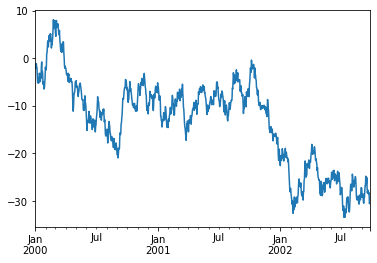

In [87]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

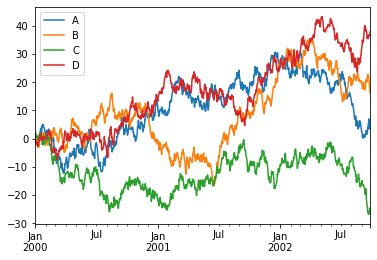

In [88]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns = ['A','B','C','D'])

df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best')

**GETTING DATA IN AND OUT**

*CSV*

Writing to csv file

In [89]:
df.to_csv('foo.csv')

Reading from a CSV file

In [90]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.295840,0.464124,0.887240,0.240530
1,2000-01-02,-0.548325,0.714469,1.886892,-0.383694
2,2000-01-03,-0.039131,-0.160389,0.303246,-1.338074
3,2000-01-04,0.378998,-0.554216,0.750441,-1.137551
4,2000-01-05,-0.703159,0.822683,0.437643,-1.770080
...,...,...,...,...,...
995,2002-09-22,6.977686,21.516889,-26.608077,36.644814
996,2002-09-23,6.072835,20.082138,-26.727761,36.356061
997,2002-09-24,3.361817,18.810743,-25.506966,36.843612
998,2002-09-25,4.043410,17.062520,-24.659990,36.831252


*HDF5*

Writing to a HDF5 store

In [91]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store

In [92]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.295840,0.464124,0.887240,0.240530
2000-01-02,-0.548325,0.714469,1.886892,-0.383694
2000-01-03,-0.039131,-0.160389,0.303246,-1.338074
2000-01-04,0.378998,-0.554216,0.750441,-1.137551
2000-01-05,-0.703159,0.822683,0.437643,-1.770080
...,...,...,...,...
2002-09-22,6.977686,21.516889,-26.608077,36.644814
2002-09-23,6.072835,20.082138,-26.727761,36.356061
2002-09-24,3.361817,18.810743,-25.506966,36.843612
2002-09-25,4.043410,17.062520,-24.659990,36.831252


*Excel*

Writing to an excel file

In [93]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [94]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col = None, na_values = ['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.295840,0.464124,0.887240,0.240530
1,2000-01-02,-0.548325,0.714469,1.886892,-0.383694
2,2000-01-03,-0.039131,-0.160389,0.303246,-1.338074
3,2000-01-04,0.378998,-0.554216,0.750441,-1.137551
4,2000-01-05,-0.703159,0.822683,0.437643,-1.770080
...,...,...,...,...,...
995,2002-09-22,6.977686,21.516889,-26.608077,36.644814
996,2002-09-23,6.072835,20.082138,-26.727761,36.356061
997,2002-09-24,3.361817,18.810743,-25.506966,36.843612
998,2002-09-25,4.043410,17.062520,-24.659990,36.831252
